This notebook computes spatial clusters of observations with one attribute (e.g. the cyclostationary_mean_rr_4w observations in the Emiliani1 sub-basin), considering their correlations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

%load_ext autoreload
%autoreload 2

In [2]:
os.chdir("../scripts")
from aux_NonLinCFA import prepare_features
from CorrelationClustering import *

In [48]:
def plot_clusters(output, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []

    cmap = plt.get_cmap('rainbow')
    plt.figure(figsize=(10,6))
    plt.title(col, fontsize = 12)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    # iterate over all the features aggregations
    for j in range (len(output)):       # j iterates all the clusters
        x = []
        y = []
        for datum in output[j]:
            x.append(float(datum.split('_')[1]))
            #print(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
            #print(float(datum.split('_')[2]))

        plt.scatter(x,y,s=200,color=cmap(1.*j/len(output))) # ax[i][0].scatter(x,y,color=colors[j])

In [52]:
colnames = ['cyclostationary_mean_tg',
        'cyclostationary_mean_tg_1w',
        'cyclostationary_mean_tg_4w',
        'cyclostationary_mean_tg_8w',
        'cyclostationary_mean_tg_12w',
        'cyclostationary_mean_tg_16w',
        'cyclostationary_mean_tg_24w',
        'cyclostationary_mean_rr',
        'cyclostationary_mean_rr_1w',
        'cyclostationary_mean_rr_4w',
        'cyclostationary_mean_rr_8w',
        'cyclostationary_mean_rr_12w',
        'cyclostationary_mean_rr_16w',
        'cyclostationary_mean_rr_24w']

col = colnames[9]
path = "../data/Emiliani1_aggreg.csv"
df_train_unfolded_std,df_val_unfolded_std,df_test_unfolded_std,df_trainVal_unfolded_std = prepare_features(path,col,multiple=False,max_train='2013-11-22', 
                            max_val='2018-04-10', max_test='2022-12-31', cols_order = "bottom_left", no_winter = False, only_winter = False)

#clusters : 7


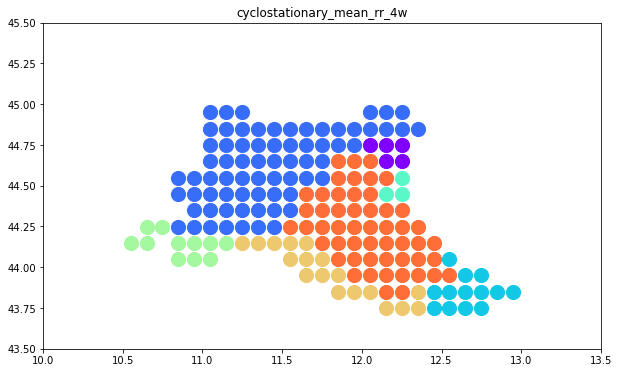

In [54]:
corr_threshold = 0.88
scale = 0.1
output = CorrelationClustering(df_train_unfolded_std, corr_threshold, scale).compute_clusters()
print("#clusters : " + str(len(output)))
plot_clusters(output, xmin=10, xmax=13.5, ymin=43.5, ymax=45.5)